In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from skbio.diversity.alpha import shannon
from scipy import stats
from scipy.spatial.distance import braycurtis, pdist, squareform
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio import DistanceMatrix

# Read Data

In [60]:
# paab = pd.read_csv("/home/PaulinaSk/mgr/pathways_ab.tsv", sep='\t', index_col=0)
# metadata = pd.read_csv("/home/PaulinaSk/mgr/bubabiba/not_MS_metadata.csv")
# metadata = pd.read_csv("/home/PaulinaSk/mgr/bubabiba/paired_imsms.csv")
metadata = pd.read_csv("/home/PaulinaSk/mgr/bubabiba/pojedyncze_cleaned_paired_imsms.csv")

In [61]:
metadata.shape

(176, 43)

In [62]:
metadata["NCBI_accession"].is_unique

True

In [63]:
# bez nagłówków
paab = pd.read_csv("/home/PaulinaSk/mgr/Filtered_pathabundance/imsms_pathways.tsv", 
                   sep="\t", header=None)

/tmp/ipykernel_1393021/53103552.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [64]:
paab.head(10)

,0,1,2,3,4,5,6,7,8,9,...,463,464,465,466,467,468,469,470,471,472
0,NaN,UNMAPPED,UNINTEGRATED,PWY-6609: adenine and adenosine salvage III,PANTO-PWY: phosphopantothenate biosynthesis I,VALSYN-PWY: L-valine biosynthesis,PWY-7238: sucrose biosynthesis II,HISTSYN-PWY: L-histidine biosynthesis,PWY-6163: chorismate biosynthesis from 3-dehyd...,PWY-6700: queuosine biosynthesis I (de novo),...,PWY-6210: 2-aminophenol degradation,PWY-5306: superpathway of thiosulfate metaboli...,PWY-3781: aerobic respiration I (cytochrome c),PWY-7279: aerobic respiration II (cytochrome c...,PWY6666-2: dopamine degradation,"PWY-6396: superpathway of 2,3-butanediol biosy...",PWY-6920: 6-gingerol analog biosynthesis (engi...,PWY-6167: flavin biosynthesis II (archaea),PWY-5870: ubiquinol-8 biosynthesis (late decar...,PWY-5873: ubiquinol-7 biosynthesis (late decar...
1,ERR6995544,48686.8013931189,33494.2751763797,24.9421317697,17.2766872394,16.3504319429,15.7617676892,15.2275729009,15.0231697059,14.1424491373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR6995537,90605.3727232562,191920.1662114878,71.3022100132,79.5092557947,74.908914201,35.706450147,77.0158656545,70.6031816559,91.0051622718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR3472757,30843.7011853672,19473.1424578451,11.4114043274,5.4265847458,11.0895201387,6.5150463542,7.9310084342,0.0,6.7250185932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ERR6995188,160046.8439835969,238942.6617254827,196.7745488622,118.4736739706,205.7999408863,110.8227657177,146.5181390669,163.2624102276,173.430932996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ERR6995485,67601.571394232,123583.1428649615,58.3448709806,57.7792395746,54.754332381,61.9107644496,34.441449921,46.4836799099,48.1134343034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ERR3472672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ERR3474317,12355.4213297061,14127.3439382748,5.9402063843,4.0647778036,14.9220822665,4.9858529764,0.0,5.6322743083,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ERR9813994,140734.6322451198,151814.4841724013,88.9932408289,42.1408541899,79.9436315759,56.6326253465,61.8437559956,65.400205459,52.8004105526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ERR3472603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Pathabundance

In [65]:
# Pierwszy wiersz (wiersz 0) to nagłówki
new_columns = ["NCBI_accession"] + paab.iloc[0, 1:].tolist()

# Usuń pierwszy wiersz (nagłówki)
paab = paab[1:]

# Ustaw nowe kolumny
paab.columns = new_columns

# Teraz SampleID jest zwykłą kolumną
# Przekształć pozostałe kolumny na wartości liczbowe
for col in paab.columns[1:]:
    paab[col] = pd.to_numeric(paab[col], errors='coerce')

# Sprawdź — SampleID powinno być widoczne
print(paab.columns[:5])
print(paab["NCBI_accession"].head())

Index(['NCBI_accession', 'UNMAPPED', 'UNINTEGRATED',
       'PWY-6609: adenine and adenosine salvage III',
       'PANTO-PWY: phosphopantothenate biosynthesis I'],
      dtype='object')
1    ERR6995544
2    ERR6995537
3    ERR3472757
4    ERR6995188
5    ERR6995485
Name: NCBI_accession, dtype: object


In [66]:
paab = paab.set_index("NCBI_accession")

In [67]:
metadata = metadata.set_index("NCBI_accession")

In [68]:
paab.head()

,UNMAPPED,UNINTEGRATED,PWY-6609: adenine and adenosine salvage III,PANTO-PWY: phosphopantothenate biosynthesis I,VALSYN-PWY: L-valine biosynthesis,PWY-7238: sucrose biosynthesis II,HISTSYN-PWY: L-histidine biosynthesis,PWY-6163: chorismate biosynthesis from 3-dehydroquinate,PWY-6700: queuosine biosynthesis I (de novo),COA-PWY: coenzyme A biosynthesis I (prokaryotic),...,PWY-6210: 2-aminophenol degradation,PWY-5306: superpathway of thiosulfate metabolism (Desulfovibrio sulfodismutans),PWY-3781: aerobic respiration I (cytochrome c),PWY-7279: aerobic respiration II (cytochrome c) (yeast),PWY6666-2: dopamine degradation,"PWY-6396: superpathway of 2,3-butanediol biosynthesis",PWY-6920: 6-gingerol analog biosynthesis (engineered),PWY-6167: flavin biosynthesis II (archaea),PWY-5870: ubiquinol-8 biosynthesis (late decarboxylation),PWY-5873: ubiquinol-7 biosynthesis (late decarboxylation)
NCBI_accession,,,,,,,,,,,,,,,,,,,,,
ERR6995544,48686.801393,33494.275176,24.942132,17.276687,16.350432,15.761768,15.227573,15.023170,14.142449,13.055099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6995537,90605.372723,191920.166211,71.302210,79.509256,74.908914,35.706450,77.015866,70.603182,91.005162,77.237386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3472757,30843.701185,19473.142458,11.411404,5.426585,11.089520,6.515046,7.931008,0.000000,6.725019,5.479399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6995188,160046.843984,238942.661725,196.774549,118.473674,205.799941,110.822766,146.518139,163.262410,173.430933,160.220161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6995485,67601.571394,123583.142865,58.344871,57.779240,54.754332,61.910764,34.441450,46.483680,48.113434,41.141800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
metadata.shape

(176, 42)

In [70]:
metadata.head()

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,disease_subtype,age,age_category,...,ms_family,allergic,vitaminD_IU,children_number,roommates,recreational_drug,pets,education,occupation,collection_method
NCBI_accession,,,,,,,,,,,,,,,,,,,,,
ERR3473323,iMSMS_2022,s_11326.Q1.71702.0010.6.22.16,s_71702-0010,stool,no,control,depression,healthy,53.0,adult,...,no,no,0.00,NaN,NaN,no,yes,post-graduate education,private tutor,qtip(dry)
ERR6997210,iMSMS_2022,s_11326.Q.76502.0008.N.A,s_76502-0008,stool,no,control,healthy,healthy,52.0,adult,...,NaN,no,285.71,NaN,NaN,NaN,NaN,NaN,NaN,qtip(dry)
ERR3473331,iMSMS_2022,s_11326.Q1.71702.0017.8.15.16,s_71702-0017,stool,no,control,depression,healthy,48.0,adult,...,no,no,0.00,2.0,NaN,no,no,college/university degree,housing support worker,qtip(dry)
ERR6996469,iMSMS_2022,s_11326.Q.71702.0107.2017.08.16,s_71702-0107,stool,no,control,healthy,healthy,48.0,adult,...,no,"Penicillin, Hayfever",0.00,1.0,NaN,no,yes,post-graduate education,physiotherapist,qtip(dry)
ERR3473346,iMSMS_2022,s_11326.Q1.71702.0033.10.4.16,s_71702-0033,stool,no,control,depression,healthy,43.0,adult,...,no,no,0.00,NaN,NaN,no,yes,college/university degree,customer service representative,qtip(dry)


W metadanych mam 'eczma;depression' a nie interesują mnie takie dane. Upraszczam sobie wystąpienia w disease tak, żeby 
- jesli depression występuje - przypisuje po prostu wartosc depression
- jeśli jest healthy - zostawiam
- jeśli nie jest ani healthy ani depression (np samo eczma) - przypisuje other

In [71]:
# usuwanie wierszy, które mają same zera

pa_filtered_clean = paab[~(paab == 0).all(axis=1)]

sum_rows_rarefied=pa_filtered_clean.sum(axis=1)

pa_filtered_rel = pa_filtered_clean.div(sum_rows_rarefied, axis=0)  #dividing each value in the row by the sum of the row

pa_filtered_rel.sum(axis=1).sort_values()

NCBI_accession
ERR6996141    1.0
ERR6996448    1.0
ERR3473634    1.0
ERR6996039    1.0
ERR6997094    1.0
             ... 
ERR3473582    1.0
ERR6995584    1.0
ERR6995896    1.0
ERR6995570    1.0
ERR3473502    1.0
Length: 2989, dtype: float64

### Filter data

Jaki chce treshold = 0.1??? Warto przegadać (((:

In [72]:
pa_filtered_rel = pa_filtered_rel[pa_filtered_rel.index.isin(metadata.index)]

In [73]:
pa_filtered_rel.shape

(175, 472)

In [74]:
def filter_prevalence(df, treshold = 0.001):
    '''features as columns'''
    df_binary = df.copy()
    df_binary[df_binary>0]=1
    df_binary_sum = df_binary.sum(axis=0)
    
    keep_features = df_binary_sum[df_binary_sum > df.shape[0]*treshold].index
    filtered_df = df[keep_features]
    
    return filtered_df

pa_filtered_rel = filter_prevalence(pa_filtered_rel)

pa_filtered_rel.shape

(175, 412)

In [75]:
# Try converting all values to numeric; non-numeric become NaN
numeric_df = pa_filtered_rel.apply(pd.to_numeric, errors='coerce')

# Check for NaN values (i.e. non-numeric)
non_numeric_mask = numeric_df.isna() & pa_filtered_rel.notna()

if non_numeric_mask.any().any():
    print("Non-numeric values found at:")
    print(pa_filtered_rel[non_numeric_mask])
else:
    print("All values are numeric.")

All values are numeric.


In [76]:
# mask = pa_filtered.isna().any(axis=1)
 
# # wiersze, które zawierają nieliczbowe wartości
# print(pa_filtered[mask])

In [77]:
metadata_filtered = metadata[metadata.index.isin(pa_filtered_rel.index)]

In [78]:
# metadata_filtered.head()

In [79]:
metadata_filtered.shape, pa_filtered_rel.shape

((175, 42), (175, 412))

In [80]:
## metadata_filtered = metadata.loc[pa_filtered.index]
metadata_filtered = metadata.loc[metadata.index.intersection(pa_filtered_rel.index)]

In [81]:
pa_filtered_rel.head()

,UNMAPPED,UNINTEGRATED,PWY-6609: adenine and adenosine salvage III,PANTO-PWY: phosphopantothenate biosynthesis I,VALSYN-PWY: L-valine biosynthesis,PWY-7238: sucrose biosynthesis II,HISTSYN-PWY: L-histidine biosynthesis,PWY-6163: chorismate biosynthesis from 3-dehydroquinate,PWY-6700: queuosine biosynthesis I (de novo),COA-PWY: coenzyme A biosynthesis I (prokaryotic),...,PWY-7031: protein N-glycosylation (bacterial),"PWY-7039: phosphatidate metabolism, as a signaling molecule",PWY-5265: peptidoglycan biosynthesis II (staphylococci),PWY-6876: isopropanol biosynthesis (engineered),PWY-7165: L-ascorbate biosynthesis VIII (engineered pathway),PWY-7396: butanol and isobutanol biosynthesis (engineered),PWY66-367: ketogenesis,PWY-5654: 2-amino-3-carboxymuconate semialdehyde degradation to 2-hydroxypentadienoate,PWY-6210: 2-aminophenol degradation,PWY-5306: superpathway of thiosulfate metabolism (Desulfovibrio sulfodismutans)
NCBI_accession,,,,,,,,,,,,,,,,,,,,,
ERR6997224,0.533906,0.453055,0.000256,0.000153,0.000276,0.000326,0.000143,0.000217,0.000177,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR9814091,0.453584,0.526864,0.000345,0.000110,0.000262,0.000207,0.000256,0.000290,0.000291,0.000192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6996002,0.273358,0.690566,0.000398,0.000270,0.000436,0.000573,0.000280,0.000390,0.000361,0.000334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6995573,0.317893,0.642829,0.000328,0.000239,0.000407,0.000396,0.000105,0.000386,0.000204,0.000238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6995991,0.699226,0.295671,0.000000,0.000228,0.000000,0.000000,0.000000,0.000000,0.000231,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Alpha diversity

#### Alpha diversity measures the within-sample microbial diversity, reflecting species richness and evenness in a single sample. Common metrics include:

1. Shannon Index – accounts for both richness and evenness.
2. Simpson Index – considers dominance by a few species.
3. Chao1 – estimates species richness, emphasizing rare species.
4. Number of features - calculates number of unique features in each sample.

In [82]:
metadata_filtered.index.is_unique
# metadata.index.is_unique

True

In [83]:
metadata_filtered.shape

(175, 42)

In [84]:
# ndeksy które sie powtarzają
dup_index = metadata_filtered.index[metadata_filtered.index.duplicated()]

# wiersze z powtarzającymi się indeksami
duplicates = metadata_filtered.loc[dup_index]

print(duplicates)


Empty DataFrame
Columns: [study_name, sample_id, subject_id, body_site, antibiotics_current_use, study_condition, disease, disease_subtype, age, age_category, gender, BMI, country, location, non_westernized, days_from_first_collection, sequencing_platform, DNA_extraction_kit, PMID, number_reads, number_bases, minimum_read_length, median_read_length, birth_control_pil, smoker, ever_smoker, family, born_method, treatment, diet, curator, years_after_onset, ms_family, allergic, vitaminD_IU, children_number, roommates, recreational_drug, pets, education, occupation, collection_method]
Index: []

[0 rows x 42 columns]


In [85]:
number_of_features_df_path   = pa_filtered_rel.astype(bool).astype(int).sum(axis=1)
shannon_df_path              = pa_filtered_rel.apply(lambda row: shannon(row), axis=1)

alpha_diversity_path         = pd.concat([number_of_features_df_path, shannon_df_path],axis=1)
alpha_diversity_path.columns = ['n_paths', 'shannon']

alpha_diversity_path         = pd.concat([metadata_filtered, alpha_diversity_path],axis=1)
# alpha_diversity_path         = pd.concat([metadata, alpha_diversity_path],axis=1).dropna()
# alpha_diversity_path         = pd.concat([metadata, alpha_diversity_path],axis=1)

In [86]:
pa_filtered_rel.shape

(175, 412)

In [87]:
metadata_filtered.shape

(175, 42)

In [88]:
# number_of_features_df_path.head()

In [89]:
# shannon_df_path.head()

In [90]:
alpha_diversity_path.shape

(175, 44)

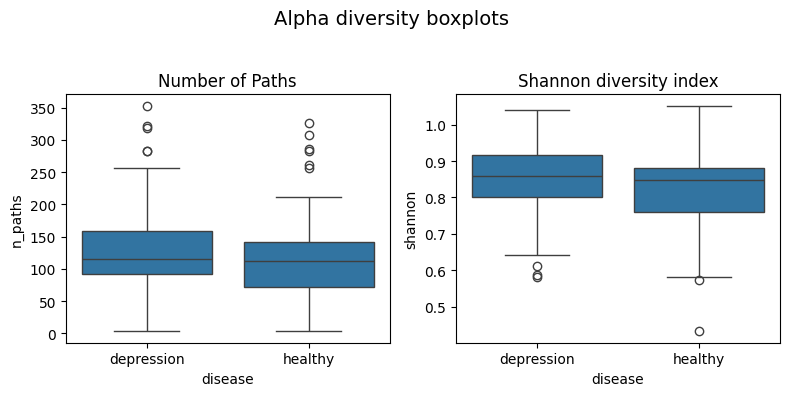

In [91]:
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(data=alpha_diversity_path, 
            x = 'disease', 
            y = 'n_paths', 
           ax=axes[0])


sns.boxplot(data=alpha_diversity_path, 
            x = 'disease', 
            y = 'shannon', 
           ax=axes[1])

axes[0].set_title('Number of Paths')
axes[1].set_title('Shannon diversity index')

plt.suptitle('Alpha diversity boxplots \n', fontsize=14)
plt.tight_layout()

In [92]:
control_samples_path = alpha_diversity_path[alpha_diversity_path['disease'] == 'healthy']
ibd_samples_path = alpha_diversity_path[alpha_diversity_path['disease'] == 'depression']

In [93]:
test_stat_path, pvalue_path = stats.kruskal(control_samples_path.n_paths, ibd_samples_path.n_paths)
print(f"P-value for Kruskal-Wallis test for number of features is = {pvalue_path:.2f}")

P-value for Kruskal-Wallis test for number of features is = 0.11


In [94]:
shannon_control = control_samples_path["shannon"].dropna()
shannon_ibd = ibd_samples_path["shannon"].dropna()

test_stat, pvalue = stats.kruskal(shannon_control, shannon_ibd)

print(f"P-value for Kruskal-Wallis test for Shannon diversity is = {pvalue:.5f}")


P-value for Kruskal-Wallis test for Shannon diversity is = 0.03977


## Beta diversity

### Beta diversity quantifies the between-sample microbial composition differences, showing how communities vary across samples. It is based on distance matrices and common metrics include:

1. Bray-Curtis Dissimilarity – considers species abundance.
2. Jaccard Index – based on presence/absence of species.
3. UniFrac – accounts for phylogenetic differences between communities (weighted or unweighted).

In [95]:
# usuwanie wierszy, które mają same zera

pa_filtered_clean = pa_filtered_rel[~(pa_filtered_rel == 0).all(axis=1)]

sum_rows_rarefied=pa_filtered_clean.sum(axis=1)

pa_filtered_rel = pa_filtered_clean.div(sum_rows_rarefied, axis=0)  #dividing each value in the row by the sum of the row

pa_filtered_rel.sum(axis=1).sort_values()

NCBI_accession
ERR9814149    1.0
ERR3473630    1.0
ERR3473438    1.0
ERR9813901    1.0
ERR3474316    1.0
             ... 
ERR6997099    1.0
ERR6997006    1.0
ERR6995839    1.0
ERR3473449    1.0
ERR6995185    1.0
Length: 175, dtype: float64

In [96]:
dM_jaccard_path      = squareform(pdist(pa_filtered_rel.astype(bool).astype(int), 'jaccard'))
pcoa_jaccard_path    = pcoa(dM_jaccard_path).samples

In [97]:
# dM_jaccard_path

In [98]:
dM_braycurtis_path   = squareform(pdist(pa_filtered_rel, 'braycurtis'))
pcoa_braycurtis_path = pcoa(dM_braycurtis_path).samples

In [99]:
# dM_braycurtis_path

In [100]:
dM_euclidean_path    = squareform(pdist(np.log(pa_filtered_rel+1e-3), 'euclidean'))
pcoa_euclidean_path  = pcoa(dM_euclidean_path).samples

In [101]:
# dM_euclidean_path

## PCoA on beta diversity distance matrix

In [102]:
disease_dict_path = dict(zip(metadata.index, metadata.disease))

pcoa_jaccard_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)
pcoa_braycurtis_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)
pcoa_euclidean_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)

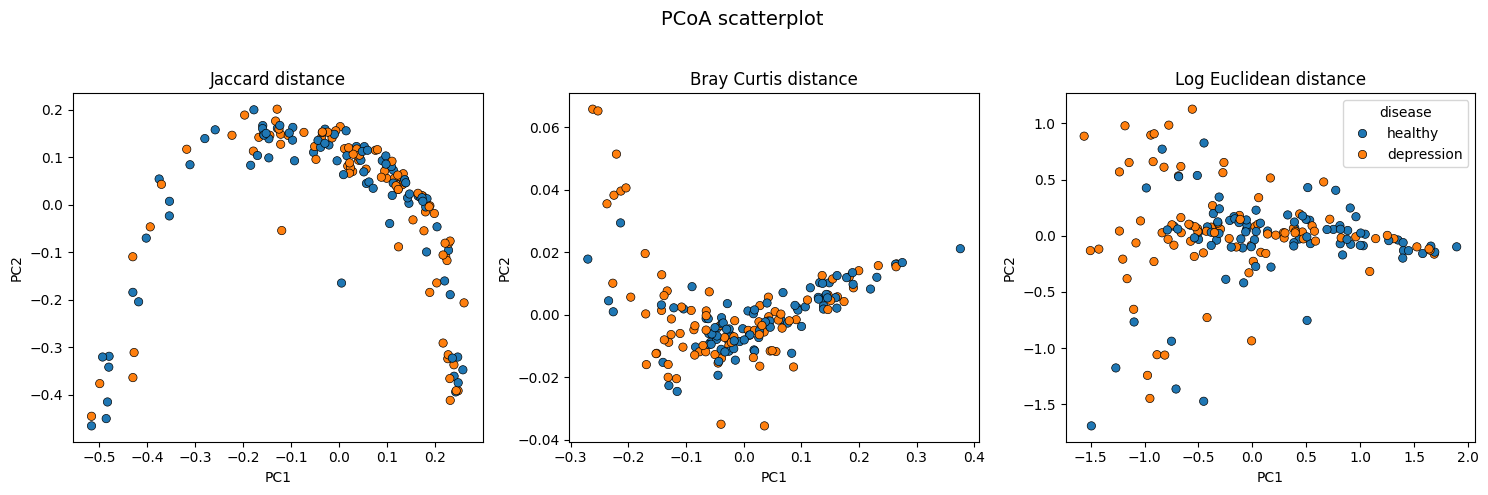

In [103]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(data=pcoa_jaccard_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                hue = 'disease',
                legend=False, 
                ax=axes[0])


sns.scatterplot(data=pcoa_braycurtis_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                hue = 'disease',
                legend=False, 
                ax=axes[1])

sns.scatterplot(data=pcoa_euclidean_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                hue = 'disease',
                ax=axes[2])

axes[0].set_title('Jaccard distance')
axes[1].set_title('Bray Curtis distance')
axes[2].set_title('Log Euclidean distance')

plt.suptitle('PCoA scatterplot \n', fontsize=14)

plt.tight_layout()

In [104]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import DistanceMatrix
from sklearn.utils import resample

def permdisp(data, metadata, group_col, metric="braycurtis", n_permutations=999, random_state=42):

    dist = pdist(data, metric=metric)
    dist_matrix = DistanceMatrix(squareform(dist), ids=data.index)
    
    groups = metadata.loc[data.index, group_col]
    centroids = {}
    dists_to_centroid = []
    labels = []
    
    for g in groups.unique():
        idx = np.where(groups == g)[0]
        sub_dm = dist_matrix.filter(data.index[idx], strict=False)
        centroid = sub_dm.data.mean(axis=0) 
        # odległości próbki -> centroid
        dist_to_centroid = sub_dm.data.mean(axis=1)
        dists_to_centroid.extend(dist_to_centroid)
        labels.extend([g] * len(dist_to_centroid))
    
    dists_to_centroid = np.array(dists_to_centroid)
    labels = np.array(labels)
    
    # ANOVA-like F
    grand_mean = dists_to_centroid.mean()
    ss_between = sum([len(dists_to_centroid[labels == g]) * 
                      (dists_to_centroid[labels == g].mean() - grand_mean) ** 2 
                      for g in np.unique(labels)])
    ss_within = sum([((dists_to_centroid[labels == g] - 
                       dists_to_centroid[labels == g].mean()) ** 2).sum() 
                     for g in np.unique(labels)])
    
    df_between = len(np.unique(labels)) - 1
    df_within = len(labels) - len(np.unique(labels))
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    F_stat = ms_between / ms_within
    
    # 
    rng = np.random.default_rng(random_state)
    perm_stats = []
    for _ in range(n_permutations):
        perm_labels = rng.permutation(labels)
        ss_between_perm = sum([len(dists_to_centroid[perm_labels == g]) * 
                               (dists_to_centroid[perm_labels == g].mean() - grand_mean) ** 2 
                               for g in np.unique(labels)])
        ms_between_perm = ss_between_perm / df_between
        F_perm = ms_between_perm / ms_within
        perm_stats.append(F_perm)
    
    p_value = (np.sum(np.array(perm_stats) >= F_stat) + 1) / (n_permutations + 1)
    
    result = {
        "method": "PERMDISP",
        "metric": metric,
        "test statistic": F_stat,
        "p-value": p_value,
        "n_perm": n_permutations
    }

    for k, v in result.items():
        print(f"{k}: {v}")


In [105]:
# domyślnie braycurtis
res_bray = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease")

print(" \n")

# jaccard
res_jaccard = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease", metric="jaccard")

print(" \n")

# euclidean
res_euc = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease", metric="euclidean")


method: PERMDISP
metric: braycurtis
test statistic: 3.6819501954752676
p-value: 0.048
n_perm: 999
 

method: PERMDISP
metric: jaccard
test statistic: 9.22974725375331e+24
p-value: 0.001
n_perm: 999
 

method: PERMDISP
metric: euclidean
test statistic: 3.091887356317202
p-value: 0.071
n_perm: 999


In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_df = pa_filtered_rel.copy()

features_df = features_df.dropna()  # lub .fillna(features_df.median(numeric_only=True))

# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)

# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_ * 100  # w %
print(f"PC1 tłumaczy: {explained_var[0]:.2f}% wariancji")
print(f"PC2 tłumaczy: {explained_var[1]:.2f}% wariancji")


PC1 tłumaczy: 28.41% wariancji
PC2 tłumaczy: 10.98% wariancji


## PERMANOVA

Test for significant differences between groups using PERMANOVA.

Permutational Multivariate Analysis of Variance (PERMANOVA) is a non-parametric method that tests whether two or more groups of objects (e.g., samples) are significantly different based on a categorical factor. It is conceptually similar to ANOVA except that it operates on a distance matrix, which allows for multivariate analysis. PERMANOVA computes a pseudo-F statistic.

Statistical significance is assessed via a permutation test. The assignment of objects to groups (grouping) is randomly permuted a number of times (controlled via permutations). A pseudo-F statistic is computed for each permutation and the p-value is the proportion of permuted pseudo-F statisics that are equal to or greater than the original (unpermuted) pseudo-F statistic.



In [107]:
grouping_variable_path = pa_filtered_rel.index.map(disease_dict_path)

In [108]:
dM_jaccard_df_path = pd.DataFrame(dM_jaccard_path)

dm_path = DistanceMatrix(dM_jaccard_df_path)
permanova(dm_path, grouping_variable_path)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     175
number of groups                  2
test statistic             1.213434
p-value                       0.219
number of permutations          999
Name: PERMANOVA results, dtype: object

In [109]:
dM_braycurtis_df_path = pd.DataFrame(dM_braycurtis_path)

dm_path = DistanceMatrix(dM_braycurtis_df_path)
permanova(dm_path, grouping_variable_path)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     175
number of groups                  2
test statistic             7.166348
p-value                       0.011
number of permutations          999
Name: PERMANOVA results, dtype: object

In [110]:
dM_euclidean_df_path = pd.DataFrame(dM_euclidean_path)

dm_path = DistanceMatrix(dM_euclidean_df_path)
permanova(dm_path, grouping_variable_path)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     175
number of groups                  2
test statistic             5.463141
p-value                       0.002
number of permutations          999
Name: PERMANOVA results, dtype: object

### Differential abundance - U Mann Whitney test

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.



In [111]:
from scipy.stats import mannwhitneyu

In [112]:
pa_filtered_rel.loc[:, 'disease'] = grouping_variable_path

pathway = pa_filtered_rel.columns[:-1]  

results = []

for path in pathway:
    
    control_samples_path = pa_filtered_rel.loc[pa_filtered_rel['disease'] == 'depression', path]
    ibd_samples_path = pa_filtered_rel.loc[pa_filtered_rel['disease'] == 'healthy', path]

    control_samples_log_path = np.log(control_samples_path+1e-3)
    ibd_samples_log_path = np.log(ibd_samples_path+1e-3)
    
    stat_path, pvalue_path = mannwhitneyu(control_samples_log_path, ibd_samples_log_path)
    results.append({'pathway': path, 'pvalue': pvalue_path, 'stat': stat_path})

results_df_path = pd.DataFrame(results)

# Adjust pvalues
results_df_path['pvalue_adj'] = stats.false_discovery_control(results_df_path.pvalue)
results_df = np.round(results_df_path, 5)

In [113]:
results_df[results_df['pvalue_adj'] < 0.05].sort_values(by = 'pvalue_adj')

,pathway,pvalue,stat,pvalue_adj
8,PWY-6700: queuosine biosynthesis I (de novo),0.00016,5092.0,0.02927
15,PWY-7221: guanosine ribonucleotides de novo bi...,0.00037,5021.0,0.02927
27,PWY-6122: 5-aminoimidazole ribonucleotide bios...,0.00069,4965.0,0.02927
28,PWY-6277: superpathway of 5-aminoimidazole rib...,0.00069,4965.0,0.02927
43,PEPTIDOGLYCANSYN-PWY: peptidoglycan biosynthes...,0.00050,4995.0,0.02927
41,PWY-6387: UDP-N-acetylmuramoyl-pentapeptide bi...,0.00051,4992.0,0.02927
37,PWY-6385: peptidoglycan biosynthesis III (myco...,0.00071,4962.0,0.02927
32,PWY-5695: inosine 5'-phosphate degradation,0.00018,5082.5,0.02927
58,PWY-6386: UDP-N-acetylmuramoyl-pentapeptide bi...,0.00048,4996.0,0.02927
64,PWY-7953: UDP-N-acetylmuramoyl-pentapeptide bi...,0.00071,4961.0,0.02927


In [114]:
filtered_results = results_df[results_df['pvalue_adj'] < 0.05]

min_pathway = filtered_results.loc[filtered_results['stat'].idxmin(), 'pathway']
max_pathway = filtered_results.loc[filtered_results['stat'].idxmax(), 'pathway']

print("Ścieżka z najniższą wartością stat:", min_pathway)
print("Ścieżka z najwyższą wartością stat:", max_pathway)


Ścieżka z najniższą wartością stat: BRANCHED-CHAIN-AA-SYN-PWY: superpathway of branched chain amino acid biosynthesis
Ścieżka z najwyższą wartością stat: PWY-6700: queuosine biosynthesis I (de novo)
